# Importing Libraries

In [2]:
#Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = 'A5yhtyYH2bCwA8H_-Pbn'

In [4]:
# Importing quandl dataset variable

data = quandl.get('EIA/AEO_2016_REF_NO_CPP_PRCE_LDTY_SCOM_NA_ELE_100MILE_NA_THY13DLR_A')

In [17]:
data.head(27)

,Value
Date,
2014-12-31,38.655304
2015-12-31,38.488258
2016-12-31,38.284752
2017-12-31,37.999702
2018-12-31,37.783287
2019-12-31,37.494881
2020-12-31,37.161030
2021-12-31,36.782654
2022-12-31,36.377670


In [18]:
data.shape

(27, 1)

In [19]:
data.columns

Index(['Value'], dtype='object')

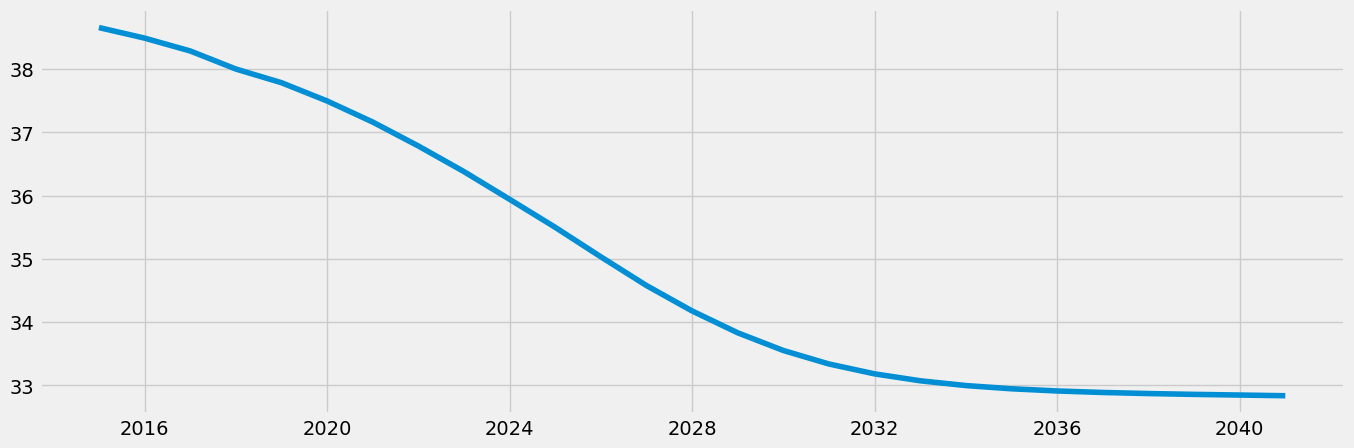

In [20]:
#Plotting values  
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data)

# Cleaning data

In [14]:
# Check for duplicates
dups = data2.duplicated()
dups.sum()

0

no duplicates found

In [15]:
# Check for missing values 
data2.isnull().sum() 

Value    0
dtype: int64

no missing values

# Decomposition

In [21]:
# Decompose using an additive model
decomposition = sm.tsa.seasonal_decompose(data2, model='additive')

In [22]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

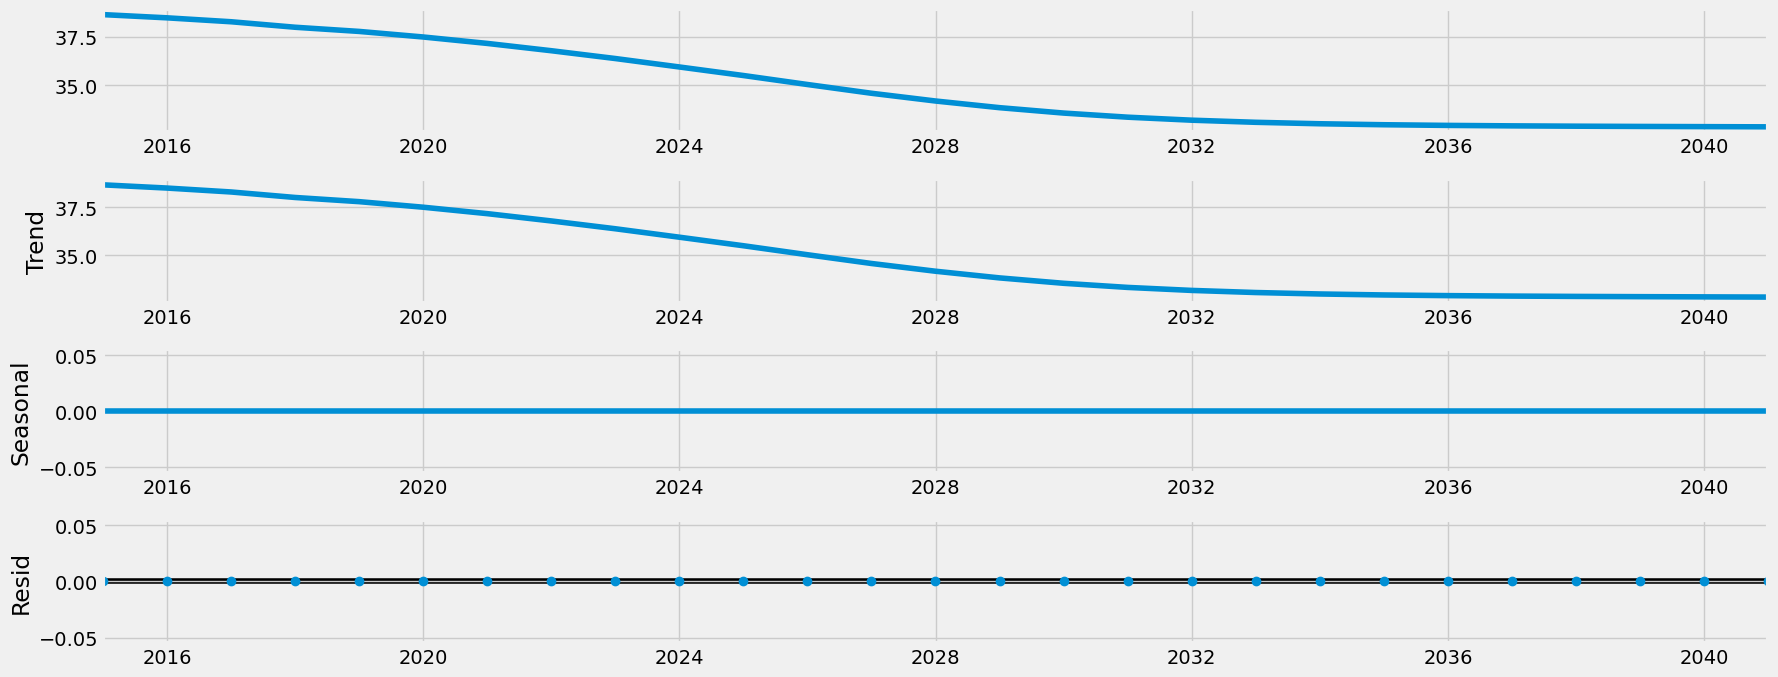

In [23]:
# Plot the separate components

decomposition.plot()
plt.show()

we can see that there is no seasonality to this data because the line is flat. The trend goes in a downward slope overtime.

# Using Dickey-Fuller test

In [25]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries):
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -4.043137
p-value                         0.001201
Number of Lags Used             9.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


pvalue is showing less than 0.5 which means it has a significant result. The test statistic is smaller than the critical value which means we can reject the null hypothesis making it stationary data.

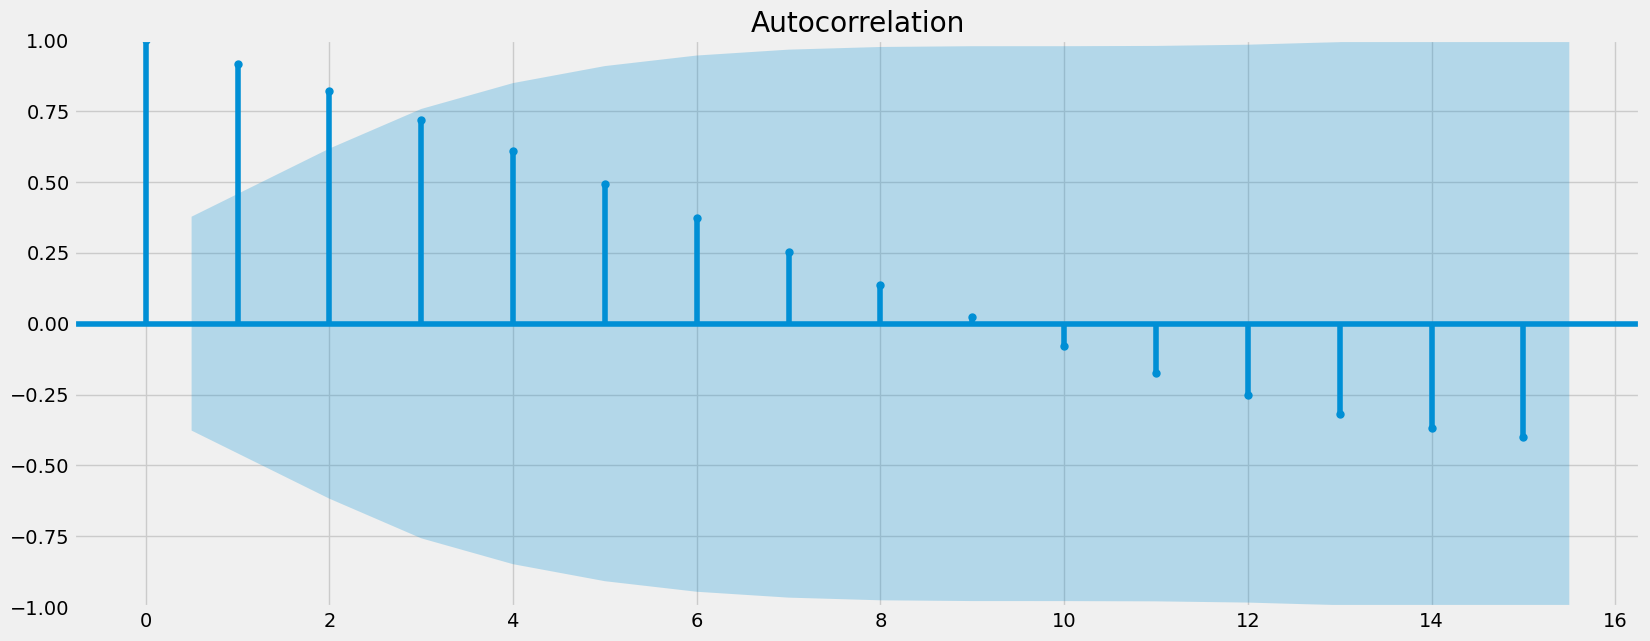

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data2)
plt.show()

Most of the vertical lines lie within the confidence interval which would further prove that our data is stationary. Since we can prove that the data is stationary there is no further stationarizing that needs to be done.